# `NumPy`: Using loops and logical operators with `arrays`

### Learning outcomes:
 - Advanced usage of the `NumPy arrays`
 - Advanced usage of `for` and `while` loops
 - Apply loops and logical operators on `numpy arrays`

In previous tutorials we have learned about `for` and `while` loops using simple Python datatypes such as `lists`. 

Here we will combine the use of loops with `NumPy` arrays. This will give us the opportunity to explore more advanced uses of `NumPy` arrays, new ways to create 2-dimensional arrays, index into arrays using loops, and explore some methods of `numpy` arrays.

*Note*. `numpy` arrays, like everything else in Python, are `objects`, so they have `properties` (nouns that describe the object) and `methods` (verbs; actions that the object can do). For example, as we have seen already, `numpy` arrays can tell you their `.shape` (a noun), or they can compute the `.mean()` of themselves (a verb).

### More tinkering with `arrays`

Needless to say, we first need to `import numpy as np`

In [1]:
import numpy as np

Technically, all data containters in `numpy` are `arrays`. But arrays can be:

* 1D (we call these "vectors")
* 2d (we call these "matrices")
* higher dimesional arrays

A numpy array could also be just a single number:

In [2]:
my_scaler = np.array([42])
print(f"Here is my scaler: {my_scaler}; its type is {type(my_scaler)}, and its shape is {my_scaler.shape}")

Here is my scaler: [42]; its type is <class 'numpy.ndarray'>, and its shape is (1,)


But this is a degenerate case because, if we want a scaler, we would just use a regular Python variable...

In [3]:
my_scaler = 42

---

To start with a little review, let's make a 1D vector.

In [4]:
oneDarray = np.array([1,2,3])
print(oneDarray)

[1 2 3]


We can investigate the shape of the array using the method `.shape`:

In [5]:
oneDarray.shape

(3,)

Ok, that means that the array has one dimension of length `3`. So, you can't index it with two indices.  You can only index it with one index.  For example, you can do this:


In [6]:
print(oneDarray[1])

2


So when we did `oneDarray.shape`, why did it report `(3,)` rather than just `3`? The reason is that the most common use of `numpy`, by far, is to work with 2d arrays of data (i.e. matrices). The (3,) with nothing after the comma indicates that this array does **not** have a column dimension, and is hence a 1D vector rather than a matrix with a single column (or row).

So, most commonly, arrays can also have more than one dimensions, say 2, making it a matrix:

In [7]:
twoDarray = np.array([[1, 2, 3], [4, 5, 6]])
print(twoDarray)

[[1 2 3]
 [4 5 6]]


In [8]:
twoDarray.shape

(2, 3)

Here we see that the first dimension is of size `2` and the second of size `3`. That is because the outer square brakets contain only two elements, two sets of square brakets, something like `[ [] , [] ]`. The outer square brakets contain the first dimension – the rows. The inner square brackets contain elements along the second dimension – the columns. 

What happens if the second row has a different number of elements than the first? Let's try:

In [9]:
twoDarray = np.array([[1, 2, 3], [4, 5, 6, 7]])
print(twoDarray)

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

That won't work. By definition, all columns and rows of an array must be of the same length. If their are missing values in any row or column, they must be coded as `nan`, which stands for "not a number", in order to fill out the array to a rectangular shape (or hyper-rectangular shape if the number of dimensions is > 2).

$\color{blue}{\text{Complete the following exercise.}}$

  - Create the `twoDarray` from above, but make it work by inserting a `numpy.nan` somewhere.

In [10]:
twoDarray = np.array([[1, 2, 3, np.nan], [4, 5, 6, 7]])
print(twoDarray)

[[ 1.  2.  3. nan]
 [ 4.  5.  6.  7.]]


---

### General methods to create `numpy` arrays

Oftentimes, as we go about doing our nice data sciency stuff, we will need to create arrays of a certain shape, which we'll later populate with other values. Depending on what we're doing, we might want to start with an array of all 1's or an array of all 0's (or, as we've already seen, and array of random numbers). We might even want to start with an array of `nan`s so that any cells that don't get filled with valid values later are already set to `nan`.

The functions `np.zeros()` and `np.ones()` allow creating arrays with the proper dimensions. Whereas the first initializes an array with, ahem, zeros inside, the second, well you know the drill... Let's see how to use them:

In [11]:
AnArrayOfZeros = np.zeros(2)
print(AnArrayOfZeros)

[0. 0.]


The above created a 1-D array of size 2.

In [12]:
AnotherArrayOfZeros = np.zeros((2,2))
print(AnotherArrayOfZeros)

[[0. 0.]
 [0. 0.]]


The above created a 2-D array of size 2 in in both dimensions. Let's create one with 3 elements in the first dimension and 4 in the second dimension:

In [13]:
myArray = np.zeros((3,4))
print(myArray)

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]


We can also use `np.ones()` in a similar way, let's create an array with 2 elements in the first dimension and 5 in the second:

In [14]:
myArray = np.ones((2,5))
print(myArray)

[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]


The arrays come with a series of methods, built-in! For example, number of dimensions can be returned by the array using the method `.ndim`:

In [15]:
myArray.ndim

2

The shape of the array  can be returned as follows:

In [16]:
myArray.shape

(2, 5)

The total number of the elements can be returned using the method `.size`:

In [17]:
myArray.size

10

$\color{blue}{\text{Complete the following exercise.}}$

 Create an 11x5 array containing all `np.nan`s (hint: any number added to or multiplied by a `nan` is a `nan`).

In [18]:
n = np.ones((11, 5))
n = np.nan * n
n

array([[nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan],
       [nan, nan, nan, nan, nan]])

---

### `for` loops on arrays

A `for` loop can be a useful way to either put data into or get data out of an array. To see this, let's first make an array filled with zeroes:

In [19]:
nRows, nCols = 10, 5   # Python let's us do this!
myArraySize = (nRows, nCols)  # we'll make a 10x5 array. Rows always come first!
anArray = np.zeros(myArraySize)
print(anArray)

[[0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


Let's think how we can start filling up arrays with data. 

One great thing about `for` loops is that we can use them to go through the rows or columns of an array (or both!) in turn, repeating some operation on each one. Let's say we need to put the numbers of the binary sequence (2, 4, 8, 16...) in turn down the columns of a 10x5 array for some future simulation.

We could do that this way:

In [20]:
anArray[:,0] = 2
anArray[:,1] = 4
anArray[:,2] = 8
anArray[:,3] = 16
anArray[:,4] = 32

anArray

array([[ 2.,  4.,  8., 16., 32.],
       [ 2.,  4.,  8., 16., 32.],
       [ 2.,  4.,  8., 16., 32.],
       [ 2.,  4.,  8., 16., 32.],
       [ 2.,  4.,  8., 16., 32.],
       [ 2.,  4.,  8., 16., 32.],
       [ 2.,  4.,  8., 16., 32.],
       [ 2.,  4.,  8., 16., 32.],
       [ 2.,  4.,  8., 16., 32.],
       [ 2.,  4.,  8., 16., 32.]])

That works, no doubt. But 

1. there's a lot of "hand coding", which is prone to mistakes
2. it would be a pain to scale up to huge arrays (as we already know)
3. it's ugly – not Pythonic at all

Now let's do this a cleaner and much more scalable way using a `for` loop (you'll reuse much of this in just a little bit).

In [21]:
nRows, nCols = 10, 5   # make variables for length and width of our array
myArraySize = (nRows, nCols)    # we'll make a 10x5 array. Rows always come first!
ourNumbers = [2, 4, 8, 16, 32]  # numbers that we'll set each column to in turn
anArray = np.zeros(myArraySize) # make an array to hold our numbers

for i in range(nCols) :
    anArray[:,i] = ourNumbers[i]
    
anArray

array([[ 2.,  4.,  8., 16., 32.],
       [ 2.,  4.,  8., 16., 32.],
       [ 2.,  4.,  8., 16., 32.],
       [ 2.,  4.,  8., 16., 32.],
       [ 2.,  4.,  8., 16., 32.],
       [ 2.,  4.,  8., 16., 32.],
       [ 2.,  4.,  8., 16., 32.],
       [ 2.,  4.,  8., 16., 32.],
       [ 2.,  4.,  8., 16., 32.],
       [ 2.,  4.,  8., 16., 32.]])

And we get the same result.

So we've swapped this:

```
anArray[:,0] = 2
anArray[:,1] = 4
anArray[:,2] = 8
anArray[:,3] = 16
anArray[:,4] = 32
```

(Yuk.)

for this:

```
for i in range(nCols) :
    anArray[:,i] = ourNumbers[i]
```
    
(Nice.)

which is already a huge improvement. But imagine if we were working with a 1000 or 10,000 element array! Doing it the first way – well – you can imagine. But doing it the second way, all we would have to do is change `nCols` and be a bit clever and compute `ourNumbers` automatically.

 Wait, what? How would we compute the binary sequence – the powers of 2 – automatically? 
 
 With a `for` loop of course! Let's do that!

In [22]:
ourNumbers = list()                # Make an empty Python list
for i in range(nCols) :
    thisNumber = 2**(i+1)          # compute 2 to the appropriate power
    ourNumbers.append(thisNumber)  # and append it to our list 
ourNumbers

[2, 4, 8, 16, 32]

---

$\color{blue}{\text{Complete the following exercise.}}$
  
  - Rewrite the above code avoiding defining (using) the `thisNumber` variable (so there should only be one line inside the `for` loop).
  
  [Use the cell below to show your code]
  

In [23]:
ourNumbers_new = list()
for i in range(nCols) :
    ourNumbers_new.append(2**(i+1))
ourNumbers_new

[2, 4, 8, 16, 32]

Okay, now write code to populate the numpy array in a way that is completely scalable (i.e. works well for any size array) using a single `for` loop. Hint: combine your code from the cell above with the "reusable" code a couple cells back.

In [29]:
nRows, nCols = 20, 8   # make variables for length and width of our array
myArraySize = (nRows, nCols)    # we'll make a 10x5 array. Rows always come first!
anArray = np.zeros(myArraySize) # make an array to hold our numbers
ourNumbers = list()

for i in range(nCols) :
    ourNumbers.append(2**(i+1))
    anArray[:,i] = ourNumbers[i]
anArray

array([[  2.,   4.,   8.,  16.,  32.,  64., 128., 256.],
       [  2.,   4.,   8.,  16.,  32.,  64., 128., 256.],
       [  2.,   4.,   8.,  16.,  32.,  64., 128., 256.],
       [  2.,   4.,   8.,  16.,  32.,  64., 128., 256.],
       [  2.,   4.,   8.,  16.,  32.,  64., 128., 256.],
       [  2.,   4.,   8.,  16.,  32.,  64., 128., 256.],
       [  2.,   4.,   8.,  16.,  32.,  64., 128., 256.],
       [  2.,   4.,   8.,  16.,  32.,  64., 128., 256.],
       [  2.,   4.,   8.,  16.,  32.,  64., 128., 256.],
       [  2.,   4.,   8.,  16.,  32.,  64., 128., 256.],
       [  2.,   4.,   8.,  16.,  32.,  64., 128., 256.],
       [  2.,   4.,   8.,  16.,  32.,  64., 128., 256.],
       [  2.,   4.,   8.,  16.,  32.,  64., 128., 256.],
       [  2.,   4.,   8.,  16.,  32.,  64., 128., 256.],
       [  2.,   4.,   8.,  16.,  32.,  64., 128., 256.],
       [  2.,   4.,   8.,  16.,  32.,  64., 128., 256.],
       [  2.,   4.,   8.,  16.,  32.,  64., 128., 256.],
       [  2.,   4.,   8.,  16.,

Notice that, now, the ***only*** thing we need to change to compute and add more or fewer powers of 2 to our array is a single value – nCols in this case – *everything else is done automatically!*

---

$\color{blue}{\text{Complete the following exercise.}}$

Write scalable code to compute the first "n" numbers of the [Fibonacci sequence](https://en.wikipedia.org/wiki/Fibonacci_number) and write each number across the rows of an n-by-1 `numpy` array. The Fibonacci sequence (named for the famous 13th century mathematician) starts with the numbers 0 and 1, and each number after that is the sum of the previous two numbers. 

In [30]:
n = 10
fibRows, fibCols = n, 1  # make variables for length and width of our array
fibArraySize = (fibRows, fibCols)    # we'll make a 10x5 array. Rows always come first!
fibArray = np.zeros(fibArraySize) # make an array to hold our numbers
fibNumbers = [0, 1]
counter = 2
previous_two = 0
previous_one = 1


while counter < n :
    counter = counter + 1
    new = previous_two + previous_one
    fibNumbers.append(new)
    previous_two=previous_one
    previous_one=new
for i in range(fibRows) :
    fibArray[i,:] = fibNumbers[i]
fibArray

array([[ 0.],
       [ 1.],
       [ 1.],
       [ 2.],
       [ 3.],
       [ 5.],
       [ 8.],
       [13.],
       [21.],
       [34.]])

---

### Nested for loops

A great thing about `for` loops is that they can be *nested* inside one another. This is best illustrated by example, so let's look at one and disect it.

In [32]:
nRows, nCols = 4, 3            # (easily changeble) array height and width
myArraySize = (nRows, nCols)    # handy list of the size 
anArray = np.zeros(myArraySize) # make the array

for i in range(nRows) :
    for j in range(nCols) :
        anArray[i,j] = i + j*nRows
        print('Hi! I\'m in row ', i, ' and column', j, '!')
        
anArray

Hi! I'm in row  0  and column 0 !
Hi! I'm in row  0  and column 1 !
Hi! I'm in row  0  and column 2 !
Hi! I'm in row  1  and column 0 !
Hi! I'm in row  1  and column 1 !
Hi! I'm in row  1  and column 2 !
Hi! I'm in row  2  and column 0 !
Hi! I'm in row  2  and column 1 !
Hi! I'm in row  2  and column 2 !
Hi! I'm in row  3  and column 0 !
Hi! I'm in row  3  and column 1 !
Hi! I'm in row  3  and column 2 !


array([[ 0.,  4.,  8.],
       [ 1.,  5.,  9.],
       [ 2.,  6., 10.],
       [ 3.,  7., 11.]])

So what's happening? In the first or "outer" loop, `for i in range(nRows) :` we're going to step through the numbers 0 to three, corresponding to the row indexes. 

At each value of `i`, the entire second or "inner" loop, `for j in range(nCols) :` is going to run, stepping through each value of `j`, corresponding to the column indexes. 

At each value of `j`, we stick a number in the `[i, j]` cell (`anArray[i,j] = i + j*nRows`), print a little message, and move on the the next value of `j`.

Once the inner loop is complete, we jump out into the outer loop, increment `i` by 1, and then jump back into the inner loop and do the whole thing again! After i has run its course from 0 to `nRows`, we say farewell to that loop and go on our way!

---

$\color{blue}{\text{Complete the following exercise.}}$
  
  - Change the above loop so that it numbers the cells from from left-to-right, top-to-bottom. Resist the temptation to cut and paste and write your code from scratch!
  
  [Use the cell below to show your code]
  

In [33]:
nRows, nCols = 4, 3
myArraySize = (nRows, nCols)
mineArray = np.zeros(myArraySize)

for i in range(nRows):
    for j in range(nCols):
        mineArray[i,j] = j+i*(nRows-1)
        print('Hi! I\'m row', i, 'and column', j, '!')
mineArray

Hi! I'm row 0 and column 0 !
Hi! I'm row 0 and column 1 !
Hi! I'm row 0 and column 2 !
Hi! I'm row 1 and column 0 !
Hi! I'm row 1 and column 1 !
Hi! I'm row 1 and column 2 !
Hi! I'm row 2 and column 0 !
Hi! I'm row 2 and column 1 !
Hi! I'm row 2 and column 2 !
Hi! I'm row 3 and column 0 !
Hi! I'm row 3 and column 1 !
Hi! I'm row 3 and column 2 !


array([[ 0.,  1.,  2.],
       [ 3.,  4.,  5.],
       [ 6.,  7.,  8.],
       [ 9., 10., 11.]])

---

The loop you just wrote numbers the cells of your array in "row-major" order, or "row wise", while the original loop numbered the cells in "column-major" order, or "column wise". 

Nested loops give you tremendous power! You go through any array element-by-element and get or set individual values. You can even do things like loading a series of data files in turn (in an outer loop), and then chewing through each data file in an inner loop.

As a final example, let's say we want to simulate a diurnal rhythm, like the cortisol level in the bloodstream of several people. We can approximate this diurnal rhythm with a sine wave. Since different people have different rhythms, we want to add a bit of randomness to when each persons cortisole level waxes and wanes. 

In [77]:
hours, person = 24, 10            # (easily changeble) array height and width
myArraySize = (hours, person)     # handy list of the size 
cortLevel = np.zeros(myArraySize) # make the array

myFreq = 2*np.pi/hours            # make the frequency once per 24 hrs

for j in range(person) :            # we'll go person by person
    myPhase = np.random.rand()  # get a random phase for this person
    for i in range(hours) :         # go down current column (person) row-by-row
        cortLevel[i,j] = np.sin((myFreq*i + myPhase)) +  0.1*np.random.randn()    # set val
        

Okay, we will now sneak in `matplotlib`, one of the major python libraries for data visualization. We will dedicate much time to learning more about this library later on. For now, we'll just use it to make a basic plot.

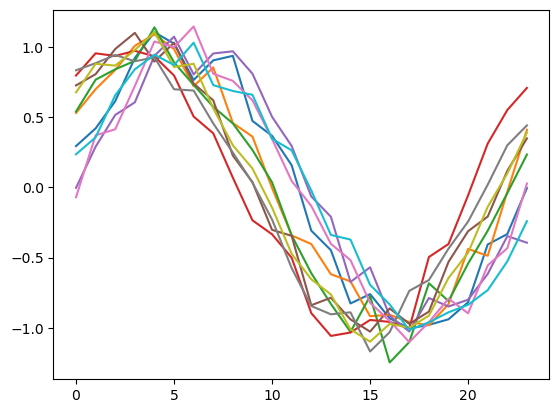

In [78]:
import matplotlib.pyplot as plt

plt.plot(cortLevel);

Cool!

$\color{blue}{\text{Complete the following exercise.}}$
  
  - In the markdown cell below, describe how the functions `np.random.rand()`, `np.sin`, and `np.random.randn()` are used in simulating the above data.

The `np.random.rand()` function is used to set a random phase for each of the 10 people so that each person has different hormone level starting values. The `np.sin` function is used to find the sin of each of the 24 hour values so that a persons hormone levels over this time are modeled. Fineally the last `np.random.randn()` function is to add a little bit of noise to the sin curves of each person so that they don't look the same.

---

### `While` loops

Sometimes we wish to repeat a calculation (or something), not for a predetermined number of times like in a `for` loop, but until some critereon is reached. This is accomplished using a `while` loops, which just keeps running and running until a critereon is reached. One dangerous thing about a `while` loop is that if the criteon can't be reached because we made a mistake in our code, then the loop runs forever – an infinite loop!

As a simple example, let's see how many tries it takes to get a number from the standard normal distribution that is above 2 - the upper 2.5% tail of the distribution!

In [148]:
x, cutOff, myCounter = 0, 2, 0

while x < cutOff :
    x = np.random.randn()
    myCounter += 1
    
myCounter

111

The dissection of the code is as follows.

* the first line sets some useful variables
    - a "test" variable `x` that will contain our candidate random numbers
    - our "cut off" variable that we will test x against
    - a "counter" variable that we'll use to count the number of tries
* the `while x < cutOff :` says "keep trying *while* `x` is less than `cutOff`
* `x = np.random.randn()` gets a random number and assignes it to `x`
* `myCounter +=` increments our counter

Once we get a random number above 2, the `x < 2` returns `False` and the loop ends. Whatever value is then in `myCounter` is our answer!

Run the above code cell several times! Does it always take the same number of times? Based on what you know about the standard normal distribution, how many times should it take?

Now here's an interesting puzzle... How many times does it take to get a big random number on average? What does the distribution look like?

How would we answer those questions?

Let's use... 

a ***for loop!***

In [153]:
nExperiments = 100  # how many times we'll do our little experiment
nSamplesNeeded = np.zeros((nExperiments, 1))
x, cutOff, = 0, 2

for i in range(nExperiments) :
    myCounter = 0
    x = 0
    while x < cutOff :
        x = np.random.randn()
        myCounter += 1
    nSamplesNeeded[i, 0] = myCounter    
    

That looks like a lot of code, but go through it carefully. All we have done is nest our `while` loop inside a `for` loop, so that we can do our "How many times?" experiment as often as we wish. On each pass through the `for` loop, we store the answer from a single experiment in the `i`th row of a numpy array!

Let's look at the number of tries it took on each experiment:

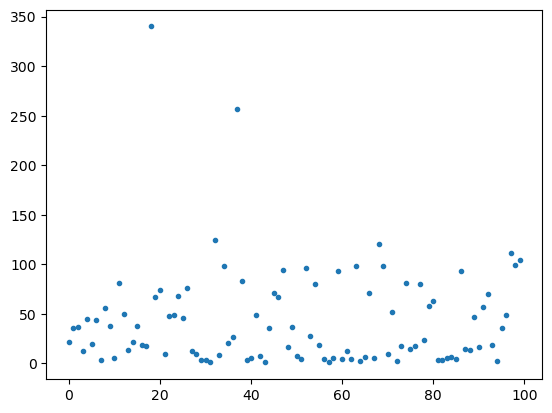

In [159]:
plt.plot(nSamplesNeeded, '.')

$\color{blue}{\text{Complete the following exercise.}}$
  
  - Describe what the plot above shows. To do so, first describe the numbers in the `y` axis then those in the `x` axis, finally describe the function and the colors, what does this all mean?
  
  [Use the cell below to describe the plot]
  

The y axis shows the number of attempts needed to get a number greater than the cutoff an each number of replication of the experiment that corresponds with the x axis. That is is each number on the x axis is the xth experiment out of 100, and the dot on the y axis shows how many attempts it took to get a number greater than the cutoff during that experiment.

Okay, cool! So it looks like we usually get a "big" number in under 50 tries, but it occasionally takes a lot longer. Let's look at the distribution of these numbers!

In [155]:
import seaborn as sns  # for making a histogram/kde

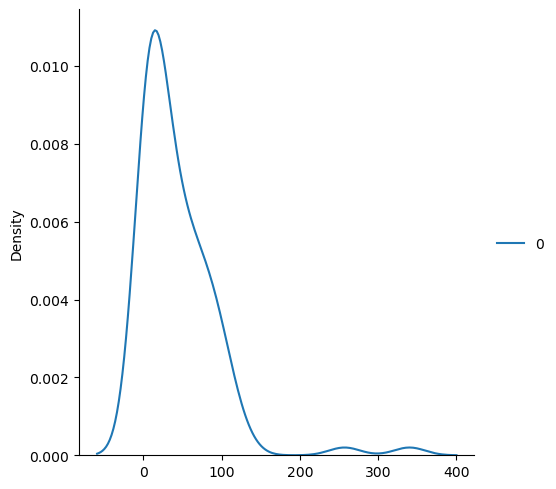

In [156]:
sns.displot(nSamplesNeeded, kind='kde')

Okay, I think that, while pretty, this plot is misleading. Can you see why?

$\color{blue}{\text{Complete the following exercise.}}$
  
  - Why might this *kernel density estimate* plot (a *continuous* version of a histogram) be misleading? Hint: look at the left side of the x-axis.
  
  [Use the cell below to answer]
  

This plot might be misleading because it starts below 0 and we can't have less than 0 attempts

Let's do a plain old histogram.

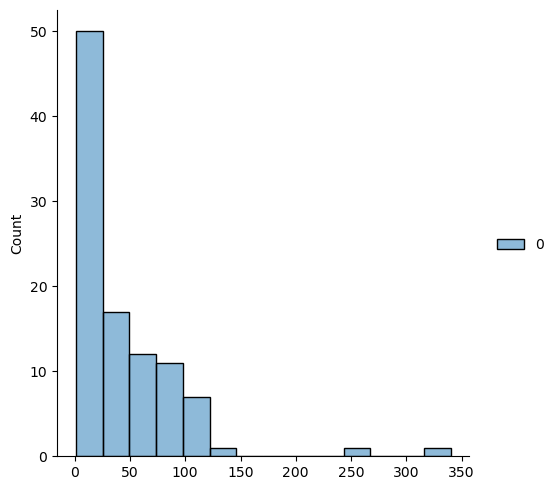

In [157]:
sns.displot(nSamplesNeeded, kind='hist')

Now this make more sense, because we can't have a negative number of tries! The histogram version also underscores the rarity of numbers above 100 a bit better.

$\color{blue}{\text{Complete the following exercise.}}$
  
  - Describe what the plot above shows. To do so, first describe the numbers in the `y` axis then those in the `x` axis, finally describe the values in the plot, what does this all mean?
  
  [Use the cell below to describe the plot]
  

The y axis of this plot shows the number of attempts that got a number greater than the cutoff within each bin on the x value. The x axis is a series of bins showing the number of attempts needed to get a number greater than the cutoff, and the y axis is a count of the number of attempts out of 100 that fall into each given bin.

---

### Logic operators on NumPy arrays

There are other types of operators that do not come standard with Python but that are part of other packages and need to be imported. These operators behave differently.

When dealing with arrays, instead of individual numbers, things look slightly different. For example, if we wanted to perform a logical operation between two sets of numbers, e.g., two arrays, operators (`=`, `>`, etc) will work or not depending on whether the array sizes are compatible. 

Let's take a look at how we would perform comparisons and logical operations with NumPy arrays.

In [160]:
myRnds = np.random.randn(1, 5) # we create an array of random numbers
myRnds

array([[-1.16051408, -1.18839228, -1.71346899,  0.35479878,  0.69863114]])

Now, imagine we wanted to know whether each number stored in the Array `myRnds` is positive. 

In [161]:
myRnds > 0

array([[False, False, False,  True,  True]])

Notice that this doesn't give us the *values*, just whether they are greater than 0 or not.

If we wanted to find out whether **any** of the numbers in an array are positive, we would use the numpy array method `any`:

In [162]:
logical_array = (myRnds > 0)
np.any(logical_array)

True

If we wanted to test whether all the values in an array are positive, we would use the method `all`. 

In [163]:
np.all(logical_array)

False

Because both `all` and `any` apply to numpy arrays, they can also be called as methods of a NumPy Arrays. For example:

In [164]:
logical_array.any()

True

In [165]:
logical_array.all()

False

Numpy arrays also allow comparing values element-wise. This means that we could compare each element of one array with the corresponding element of another array provide that the two arrays have the same size.

In [166]:
gt = np.array([1, 2, 3]) > np.array([1, 4, 3])
print(gt)

[False False False]


Compares 1 to 1, 2 to 4 and 3 to 3. This is called ***elementwise*** behavior.

We can also compare logical arrays using our `and`s and `or`s:

In [167]:
array_one = np.random.randn(1,5) > 0;
array_two = np.random.randn(1,5) > 0;
print(f"array one: {array_one} \narray two: {array_two}")

array one: [[False False  True  True False]] 
array two: [[ True  True  True False False]]


In [168]:
array_one & array_two

array([[False, False,  True, False, False]])

In [169]:
array_one | array_two

array([[ True,  True,  True,  True, False]])

In [170]:
array_one ^ array_two

array([[ True,  True, False,  True, False]])

NumPy also provides functional versions of these.

In [171]:
array_one = np.random.randn(1,5) > 0;
array_two = np.random.randn(1,5) > 0;
np.logical_and(array_one, array_two)

array([[False, False, False, False,  True]])

In [172]:
np.logical_or(array_one, array_two)

array([[ True,  True,  True, False,  True]])

Which you use is a matter of style, and which is more clear can be situationally dependent.

What happens if the two arrays have different size, though?

In [173]:
vector_one = np.random.randn(1,6) > 0;
vector_two = np.random.randn(1,5) > 0;
np.logical_and(vector_one, vector_two)

ValueError: operands could not be broadcast together with shapes (1,6) (1,5) 

And, of course, a discussion of logical operators would not be complete without `not`:

In [174]:
np.logical_not(array_one)

array([[False,  True, False,  True, False]])

In [175]:
~array_one

array([[False,  True, False,  True, False]])

$\color{blue}{\text{Complete the following exercise.}}$
  
  - Create an array of uniform random numbers with dimensions rows=1 and columns=8.
  
  [Use the cell below to write your code]
  

In [178]:
my_array = np.random.randn(1, 8)

array([[False,  True, False, False,  True, False,  True, False]])

   - how many numbers were generated with a value larger than 0.5?
  
  [Use the cell below to write your code]
  

In [181]:
sum(sum(my_array > 0))

3

---

So in this tutorial we have shown how to organize and manipulate data using Python `numpy` `arrays`. 

We have also worked through the very important element of code called ***loops*** and how they apply to NumPy Arrays.

The most frequently used loop is the `for` loop, which allows us to do a computation a number of times. It can be used to do things like crawl through the rows and columns of a numpy array. With a pair of nested `for` loops, we can even crawl through each cell of an array in either row-major or column-major order. We could even use a `for` loop to chew through a series of data files, etc.

A `while` loop is used when we don't know ahead of time how many times we'll need to do the calculation. The while loop allows us to compute or look at thing as many times as necessary until some condition as met. We just have to be careful that we don't make a dreaded *infinite* loop (what sort of cut off would make the `while` loop above essentially infinite?).